<a href="https://colab.research.google.com/github/paarmitap/Modelling-the-vertical-transmission-of-AIDS-Epidemic/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

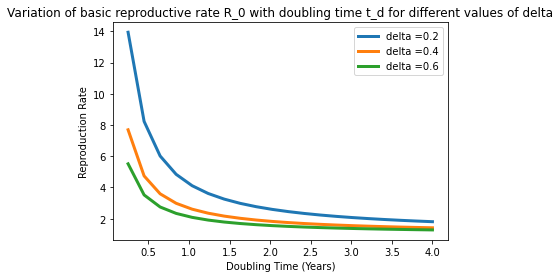

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
n=20
t=np.linspace(0.25,4,n)
R_0=np.empty(n)
R_1=np.empty(n)
R_2=np.empty(n)



for i in range(n):
        R_0[i] = 1 + (0.6931/(t[i] * (0.2 + 1/70)))
        R_1[i] = 1 + (0.6931/(t[i] * (0.4 + 1/70)))
        R_2[i] = 1 + (0.6931/(t[i] * (0.6 + 1/70)))
    
   

plt.plot(t, R_0, label='delta =0.2',linewidth=3)

plt.plot(t, R_1, label='delta =0.4',linewidth=3)

plt.plot(t, R_2, label='delta =0.6',linewidth=3)
plt.legend(loc='best')
plt.xlabel('Doubling Time (Years)')
plt.ylabel('Reproduction Rate')
plt.title('Variation of basic reproductive rate R_0 with doubling time t_d for different values of delta')
plt.show()
    


    
   

bifurcation code

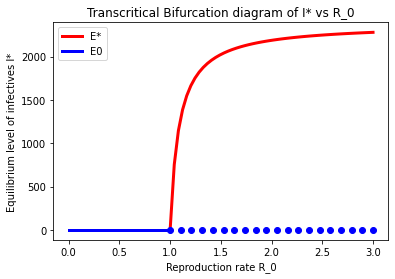

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Dec  4 16:52:07 2020

@author: cosmos
"""
import numpy as np
import matplotlib.pyplot as plt


Q=1000
d=0.02
E=0.4
beta=0.15
c=10
n=50
mu=0.5
sigma=0.6
a=1
delta=0.4
theta=0.01
N=np.empty(n)
I1=np.zeros(50)
I2=np.zeros(20)

r=np.linspace(1,3,n)
r1=np.linspace(0,1,n)
r2=np.linspace(1,3,20)

q = (mu + d) / (sigma * delta)

p = (a + d) / (mu + ((1 - sigma)*(mu + d))/sigma)

def BIF(r):
    I = p * q * ((Q * (r-1)) / ((a*(r-1)) + r * (1 + p + (p * q)) * d ))
    return I
    
    
for i in range(n):
    N =  BIF(r)
       
    
plt.plot(r,N,color='r', label='E*',linewidth=3)
plt.plot(r1,I1,color='b',label='E0',linewidth=3)
plt.plot(r2,I2,'o', color='b')
plt.xlabel('Reproduction rate R_0')
plt.ylabel('Equilibrium level of infectives I*')
plt.title('Transcritical Bifurcation diagram of I* vs R_0')
plt.legend()
plt.show()




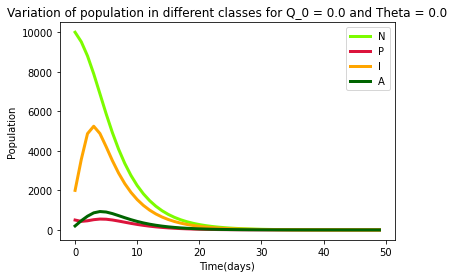

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Lambda=0
d=1/70
E=0.4
beta=0.05
c=25
T=0.0
mu=0.5
sigma=0.3
a=1
delta=0.2

N0, I0, P0, A0 = 10000, 2000, 500, 200  # initial conditions
n=50
t=[x for x in range(n)] # no of days

def RK4(n, N0, I0, P0, A0, dt = 1):
     
    N=np.empty(n)
  
    I=np.empty(n)
    P=np.empty(n)
    A=np.empty(n)
    N[0],P[0],I[0],A[0]=N0,P0,I0,A0
    
    def dNdt(t, N, I, A):
        return (Lambda - d * N - a * A + ( 1 - E ) * T * I )

    def dIdt(t, N, P, I, A):
        return ( (beta * c * ( N - I - P - A ) * I ) / N - ( delta + d ) * I + (1 - E) * T * I )
    
    def dPdt(t, P, I):
        return ( (delta * sigma * I) - (mu + d) * P )

   
    def dAdt(t, I, A, P):
        return (( 1 - sigma) * delta * I + mu * P - (a + d) * A )
  
    for i in range(0,n-1):
        Ni = N[i]
        Ii = I[i]
        Pi = P[i]
        Ai = A[i]
       

        N_k1 = dNdt(i, Ni, Ii, Ai)
        I_k1 = dIdt(t, Ni, Pi, Ii, Ai)
        P_k1 = dPdt(i, Pi, Ii)
        A_k1 = dAdt(i, Ii, Ai, Pi)
     
        
        
        N_k2 = dNdt(i + dt / 2, Ni + dt / 2 * N_k1, Ii + dt / 2 * I_k1, Ai + dt / 2 * A_k1)
        I_k2 = dIdt(i + dt / 2, Ni + dt / 2 * N_k1, Pi + dt / 2 * P_k1, Ii + dt / 2 * I_k1, Ai + dt / 2 * A_k1)
        P_k2 = dPdt(i + dt / 2, Pi + dt / 2 * P_k1, Ii + dt / 2 * I_k1)
        A_k2 = dAdt(i + dt / 2, Ii + dt / 2 * I_k1, Ai + dt / 2 * A_k1, Pi + dt / 2 * P_k1)
        
        N_k3 = dNdt(i + dt / 2, Ni + dt / 2 * N_k2, Ii + dt / 2 * I_k2, Ai + dt / 2 * A_k2)
        I_k3 = dIdt(i + dt / 2, Ni + dt / 2 * N_k2, Pi + dt / 2 * P_k2, Ii + dt / 2 * I_k2, Ai + dt / 2 * A_k2)
        P_k3 = dPdt(i + dt / 2, Pi + dt / 2 * P_k2, Ii + dt / 2 * I_k2)
        A_k3 = dAdt(i + dt / 2, Ii + dt / 2 * I_k2, Ai + dt / 2 * A_k2, Pi + dt / 2 * P_k2)
        
    
        N_k4 = dNdt(i + dt, Ni + dt * N_k3, Ii + dt * I_k3, Ai + dt * A_k3)
        I_k4 = dIdt(i + dt, Ni + dt * N_k3, Pi + dt * P_k3, Ii + dt * I_k3, Ai + dt * A_k3)
        P_k4 = dPdt(i + dt, Pi + dt * P_k3, Ii + dt * I_k3)
        A_k4 = dAdt(i + dt, Ii + dt * I_k3, Ai + dt * A_k3, Pi + dt * P_k3)
        
    
        N[i + 1] = Ni + dt / 6 * (N_k1 + 2 * N_k2 + 2 * N_k3 + N_k4)
        I[i + 1] = Ii + dt / 6 * (I_k1 + 2 * I_k2 + 2 * I_k3 + I_k4)
        P[i + 1] = Pi + dt / 6 * (P_k1 + 2 * P_k2 + 2 * P_k3 + P_k4)
        A[i + 1] = Ai + dt / 6 * (A_k1 + 2 * A_k2 + 2 * A_k3 + A_k4)
        
        
    plt.plot(t,N,label='N',color='lawngreen',linewidth=3)    
    plt.plot(t,P,label='P',color='crimson',linewidth=3)
    plt.plot(t,I,label='I',color='orange',linewidth=3)
    plt.plot(t,A,label='A',color='darkgreen',linewidth=3)
  
    plt.legend(loc='best')
    plt.title("Variation of population in different classes for Q_0 = 0.0 and Theta = 0.0",loc='center')
    plt.xlabel('Time(days)')
    plt.ylabel('Population')
    plt.show()
    
RK4(n, 10000, 2000, 500, 200, 1)


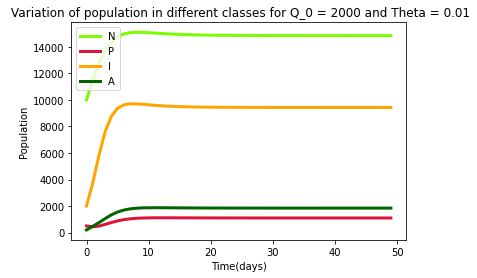

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Lambda=2000
d=1/70
E=0.4
beta=0.05
c=25
T=0.01
mu=0.5
sigma=0.3
a=1
delta=0.2

N0, I0, P0, A0 = 10000, 2000, 500, 200  # initial conditions
n=50
t=[x for x in range(n)] # no of days

def RK4(n, N0, I0, P0, A0, dt = 1):
     
    N=np.empty(n)
  
    I=np.empty(n)
    P=np.empty(n)
    A=np.empty(n)
    N[0],P[0],I[0],A[0]=N0,P0,I0,A0
    
    def dNdt(t, N, I, A):
        return (Lambda - d * N - a * A + ( 1 - E ) * T * I )

    def dIdt(t, N, P, I, A):
        return ( (beta * c * ( N - I - P - A ) * I ) / N - ( delta + d ) * I + (1 - E) * T * I )
    
    def dPdt(t, P, I):
        return ( (delta * sigma * I) - (mu + d) * P )

   
    def dAdt(t, I, A, P):
        return (( 1 - sigma) * delta * I + mu * P - (a + d) * A )
  
    for i in range(0,n-1):
        Ni = N[i]
        Ii = I[i]
        Pi = P[i]
        Ai = A[i]
       

        N_k1 = dNdt(i, Ni, Ii, Ai)
        I_k1 = dIdt(t, Ni, Pi, Ii, Ai)
        P_k1 = dPdt(i, Pi, Ii)
        A_k1 = dAdt(i, Ii, Ai, Pi)
     
        
        
        N_k2 = dNdt(i + dt / 2, Ni + dt / 2 * N_k1, Ii + dt / 2 * I_k1, Ai + dt / 2 * A_k1)
        I_k2 = dIdt(i + dt / 2, Ni + dt / 2 * N_k1, Pi + dt / 2 * P_k1, Ii + dt / 2 * I_k1, Ai + dt / 2 * A_k1)
        P_k2 = dPdt(i + dt / 2, Pi + dt / 2 * P_k1, Ii + dt / 2 * I_k1)
        A_k2 = dAdt(i + dt / 2, Ii + dt / 2 * I_k1, Ai + dt / 2 * A_k1, Pi + dt / 2 * P_k1)
        
        N_k3 = dNdt(i + dt / 2, Ni + dt / 2 * N_k2, Ii + dt / 2 * I_k2, Ai + dt / 2 * A_k2)
        I_k3 = dIdt(i + dt / 2, Ni + dt / 2 * N_k2, Pi + dt / 2 * P_k2, Ii + dt / 2 * I_k2, Ai + dt / 2 * A_k2)
        P_k3 = dPdt(i + dt / 2, Pi + dt / 2 * P_k2, Ii + dt / 2 * I_k2)
        A_k3 = dAdt(i + dt / 2, Ii + dt / 2 * I_k2, Ai + dt / 2 * A_k2, Pi + dt / 2 * P_k2)
        
    
        N_k4 = dNdt(i + dt, Ni + dt * N_k3, Ii + dt * I_k3, Ai + dt * A_k3)
        I_k4 = dIdt(i + dt, Ni + dt * N_k3, Pi + dt * P_k3, Ii + dt * I_k3, Ai + dt * A_k3)
        P_k4 = dPdt(i + dt, Pi + dt * P_k3, Ii + dt * I_k3)
        A_k4 = dAdt(i + dt, Ii + dt * I_k3, Ai + dt * A_k3, Pi + dt * P_k3)
        
    
        N[i + 1] = Ni + dt / 6 * (N_k1 + 2 * N_k2 + 2 * N_k3 + N_k4)
        I[i + 1] = Ii + dt / 6 * (I_k1 + 2 * I_k2 + 2 * I_k3 + I_k4)
        P[i + 1] = Pi + dt / 6 * (P_k1 + 2 * P_k2 + 2 * P_k3 + P_k4)
        A[i + 1] = Ai + dt / 6 * (A_k1 + 2 * A_k2 + 2 * A_k3 + A_k4)
        
        
    plt.plot(t,N,label='N',color='lawngreen',linewidth=3)    
    plt.plot(t,P,label='P',color='crimson',linewidth=3)
    plt.plot(t,I,label='I',color='orange',linewidth=3)
    plt.plot(t,A,label='A',color='darkgreen',linewidth=3)
  
    plt.legend(loc='best')
    plt.title(" Variation of population in different classes for Q_0 = 2000 and Theta = 0.01",loc='center')
    plt.xlabel('Time(days)')
    plt.ylabel('Population')
    plt.show()
    
RK4(n, 10000, 2000, 500, 200, 1)

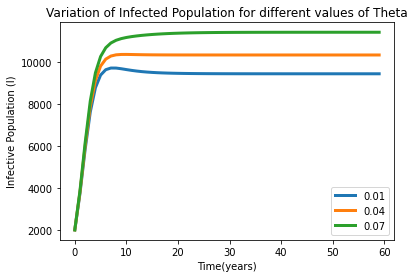

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Q=2000
d=1/70
E=0.4
beta=0.05
c=25
T=0
mu=0.5
sigma=0.3
a=1
delta=0.2

N0, I0, P0, A0 = 10000, 2000, 500, 200  # initial conditions
n=60
t=[x for x in range(n)] # no of days

def RK4(n,T, N0, I0, P0, A0, dt = 1):
     
    N=np.empty(n)
  
    I=np.empty(n)
    P=np.empty(n)
    A=np.empty(n)
    N[0],P[0],I[0],A[0]=N0,P0,I0,A0
    
    def dNdt(t, N, I, A):
        return (Q - d * N - a * A + ( 1 - E ) * T * I )

    def dIdt(t, N, P, I, A):
        return ( (beta * c * ( N - I - P - A ) * I ) / N - ( delta + d ) * I + (1 - E) * T * I )
    
    def dPdt(t, P, I):
        return ( (delta * sigma * I) - (mu + d) * P )

   
    def dAdt(t, I, A, P):
        return (( 1 - sigma) * delta * I + mu * P - (a + d) * A )
  
    for i in range(0,n-1):
        Ni = N[i]
        Ii = I[i]
        Pi = P[i]
        Ai = A[i]
       

        N_k1 = dNdt(i, Ni, Ii, Ai)
        I_k1 = dIdt(t, Ni, Pi, Ii, Ai)
        P_k1 = dPdt(i, Pi, Ii)
        A_k1 = dAdt(i, Ii, Ai, Pi)
     
        
        
        N_k2 = dNdt(i + dt / 2, Ni + dt / 2 * N_k1, Ii + dt / 2 * I_k1, Ai + dt / 2 * A_k1)
        I_k2 = dIdt(i + dt / 2, Ni + dt / 2 * N_k1, Pi + dt / 2 * P_k1, Ii + dt / 2 * I_k1, Ai + dt / 2 * A_k1)
        P_k2 = dPdt(i + dt / 2, Pi + dt / 2 * P_k1, Ii + dt / 2 * I_k1)
        A_k2 = dAdt(i + dt / 2, Ii + dt / 2 * I_k1, Ai + dt / 2 * A_k1, Pi + dt / 2 * P_k1)
        
        N_k3 = dNdt(i + dt / 2, Ni + dt / 2 * N_k2, Ii + dt / 2 * I_k2, Ai + dt / 2 * A_k2)
        I_k3 = dIdt(i + dt / 2, Ni + dt / 2 * N_k2, Pi + dt / 2 * P_k2, Ii + dt / 2 * I_k2, Ai + dt / 2 * A_k2)
        P_k3 = dPdt(i + dt / 2, Pi + dt / 2 * P_k2, Ii + dt / 2 * I_k2)
        A_k3 = dAdt(i + dt / 2, Ii + dt / 2 * I_k2, Ai + dt / 2 * A_k2, Pi + dt / 2 * P_k2)
        
    
        N_k4 = dNdt(i + dt, Ni + dt * N_k3, Ii + dt * I_k3, Ai + dt * A_k3)
        I_k4 = dIdt(i + dt, Ni + dt * N_k3, Pi + dt * P_k3, Ii + dt * I_k3, Ai + dt * A_k3)
        P_k4 = dPdt(i + dt, Pi + dt * P_k3, Ii + dt * I_k3)
        A_k4 = dAdt(i + dt, Ii + dt * I_k3, Ai + dt * A_k3, Pi + dt * P_k3)
        
    
        N[i + 1] = Ni + dt / 6 * (N_k1 + 2 * N_k2 + 2 * N_k3 + N_k4)
        I[i + 1] = Ii + dt / 6 * (I_k1 + 2 * I_k2 + 2 * I_k3 + I_k4)
        P[i + 1] = Pi + dt / 6 * (P_k1 + 2 * P_k2 + 2 * P_k3 + P_k4)
        A[i + 1] = Ai + dt / 6 * (A_k1 + 2 * A_k2 + 2 * A_k3 + A_k4)
        
        
    #plt.plot(t,N,label='N',color='lawngreen',linewidth=3)    
    #plt.plot(t,P,label='P',color='crimson',linewidth=3)
    plt.plot(t,I,label= T, linewidth=3)#, color='orange',linewidth=3)
    #plt.plot(t,A, label=T, linewidth=3,color='darkgreen',linewidth=3)
  
    plt.legend(loc='best')
    plt.xlabel('Time(years)')
    plt.ylabel('Infective Population (I)')
    plt.title('Variation of Infected Population for different values of Theta')
RK4(n, 0.01, 10000, 2000, 500, 200, 1)    
RK4(n, 0.04, 10000, 2000, 500, 200, 1)
RK4(n, 0.07, 10000, 2000, 500, 200, 1) 

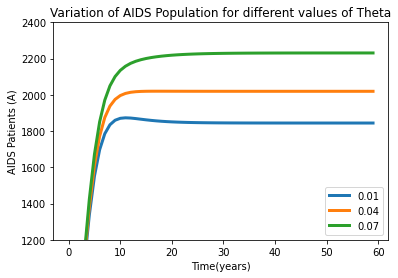

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Q=2000
d=1/70
E=0.4
beta=0.05
c=25
T=0
mu=0.5
sigma=0.3
a=1
delta=0.2

N0, I0, P0, A0 = 10000, 2000, 500, 200  # initial conditions
n=60
t=[x for x in range(n)] # no of days

def RK4(n,T, N0, I0, P0, A0, dt = 1):
     
    N=np.empty(n)
  
    I=np.empty(n)
    P=np.empty(n)
    A=np.empty(n)
    N[0],P[0],I[0],A[0]=N0,P0,I0,A0
    
    def dNdt(t, N, I, A):
        return (Q - d * N - a * A + ( 1 - E ) * T * I )

    def dIdt(t, N, P, I, A):
        return ( (beta * c * ( N - I - P - A ) * I ) / N - ( delta + d ) * I + (1 - E) * T * I )
    
    def dPdt(t, P, I):
        return ( (delta * sigma * I) - (mu + d) * P )

   
    def dAdt(t, I, A, P):
        return (( 1 - sigma) * delta * I + mu * P - (a + d) * A )
  
    for i in range(0,n-1):
        Ni = N[i]
        Ii = I[i]
        Pi = P[i]
        Ai = A[i]
       

        N_k1 = dNdt(i, Ni, Ii, Ai)
        I_k1 = dIdt(t, Ni, Pi, Ii, Ai)
        P_k1 = dPdt(i, Pi, Ii)
        A_k1 = dAdt(i, Ii, Ai, Pi)
     
        
        
        N_k2 = dNdt(i + dt / 2, Ni + dt / 2 * N_k1, Ii + dt / 2 * I_k1, Ai + dt / 2 * A_k1)
        I_k2 = dIdt(i + dt / 2, Ni + dt / 2 * N_k1, Pi + dt / 2 * P_k1, Ii + dt / 2 * I_k1, Ai + dt / 2 * A_k1)
        P_k2 = dPdt(i + dt / 2, Pi + dt / 2 * P_k1, Ii + dt / 2 * I_k1)
        A_k2 = dAdt(i + dt / 2, Ii + dt / 2 * I_k1, Ai + dt / 2 * A_k1, Pi + dt / 2 * P_k1)
        
        N_k3 = dNdt(i + dt / 2, Ni + dt / 2 * N_k2, Ii + dt / 2 * I_k2, Ai + dt / 2 * A_k2)
        I_k3 = dIdt(i + dt / 2, Ni + dt / 2 * N_k2, Pi + dt / 2 * P_k2, Ii + dt / 2 * I_k2, Ai + dt / 2 * A_k2)
        P_k3 = dPdt(i + dt / 2, Pi + dt / 2 * P_k2, Ii + dt / 2 * I_k2)
        A_k3 = dAdt(i + dt / 2, Ii + dt / 2 * I_k2, Ai + dt / 2 * A_k2, Pi + dt / 2 * P_k2)
        
    
        N_k4 = dNdt(i + dt, Ni + dt * N_k3, Ii + dt * I_k3, Ai + dt * A_k3)
        I_k4 = dIdt(i + dt, Ni + dt * N_k3, Pi + dt * P_k3, Ii + dt * I_k3, Ai + dt * A_k3)
        P_k4 = dPdt(i + dt, Pi + dt * P_k3, Ii + dt * I_k3)
        A_k4 = dAdt(i + dt, Ii + dt * I_k3, Ai + dt * A_k3, Pi + dt * P_k3)
        
    
        N[i + 1] = Ni + dt / 6 * (N_k1 + 2 * N_k2 + 2 * N_k3 + N_k4)
        I[i + 1] = Ii + dt / 6 * (I_k1 + 2 * I_k2 + 2 * I_k3 + I_k4)
        P[i + 1] = Pi + dt / 6 * (P_k1 + 2 * P_k2 + 2 * P_k3 + P_k4)
        A[i + 1] = Ai + dt / 6 * (A_k1 + 2 * A_k2 + 2 * A_k3 + A_k4)
        
        
    #plt.plot(t,N,label='N',color='lawngreen',linewidth=3)    
    #plt.plot(t,P,label='P',color='crimson',linewidth=3)
    #plt.plot(t,I,label= 'I', color='orange',linewidth=3)
    plt.plot(t,A, label=T, linewidth=3)#,color='darkgreen',linewidth=3)
  
    plt.legend(loc='best')
    plt.xlabel('Time(years)')
    plt.ylabel('AIDS Patients (A)')
    plt.title('Variation of AIDS Population for different values of Theta')
    plt.ylim(1200,2400)

RK4(n, 0.01, 10000, 2000, 500, 200, 1)    
   
RK4(n, 0.04, 10000, 2000, 500, 200, 1)
RK4(n, 0.07, 10000, 2000, 500, 200, 1) 


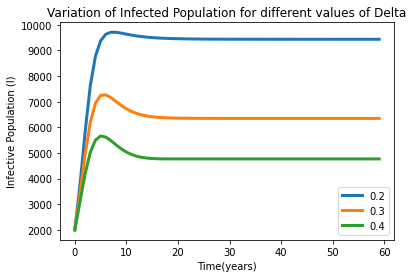

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Q=2000
d=1/70
E=0.4
beta=0.05
c=25
T=0.01
mu=0.5
sigma=0.3
a=1
#delta=0.2

N0, I0, P0, A0 = 10000, 2000, 500, 200  # initial conditions
n=60
t=[x for x in range(n)] # no of days

def RK4(n, delta, N0, I0, P0, A0, dt = 1):
     
    N=np.empty(n)
  
    I=np.empty(n)
    P=np.empty(n)
    A=np.empty(n)
    N[0],P[0],I[0],A[0]=N0,P0,I0,A0
    
    def dNdt(t, N, I, A):
        return (Q - d * N - a * A + ( 1 - E ) * T * I )

    def dIdt(t, N, P, I, A):
        return ( (beta * c * ( N - I - P - A ) * I ) / N - ( delta + d ) * I + (1 - E) * T * I )
    
    def dPdt(t, P, I):
        return ( (delta * sigma * I) - (mu + d) * P )

   
    def dAdt(t, I, A, P):
        return (( 1 - sigma) * delta * I + mu * P - (a + d) * A )
  
    for i in range(0,n-1):
        Ni = N[i]
        Ii = I[i]
        Pi = P[i]
        Ai = A[i]
       

        N_k1 = dNdt(i, Ni, Ii, Ai)
        I_k1 = dIdt(t, Ni, Pi, Ii, Ai)
        P_k1 = dPdt(i, Pi, Ii)
        A_k1 = dAdt(i, Ii, Ai, Pi)
     
        
        
        N_k2 = dNdt(i + dt / 2, Ni + dt / 2 * N_k1, Ii + dt / 2 * I_k1, Ai + dt / 2 * A_k1)
        I_k2 = dIdt(i + dt / 2, Ni + dt / 2 * N_k1, Pi + dt / 2 * P_k1, Ii + dt / 2 * I_k1, Ai + dt / 2 * A_k1)
        P_k2 = dPdt(i + dt / 2, Pi + dt / 2 * P_k1, Ii + dt / 2 * I_k1)
        A_k2 = dAdt(i + dt / 2, Ii + dt / 2 * I_k1, Ai + dt / 2 * A_k1, Pi + dt / 2 * P_k1)
        
        N_k3 = dNdt(i + dt / 2, Ni + dt / 2 * N_k2, Ii + dt / 2 * I_k2, Ai + dt / 2 * A_k2)
        I_k3 = dIdt(i + dt / 2, Ni + dt / 2 * N_k2, Pi + dt / 2 * P_k2, Ii + dt / 2 * I_k2, Ai + dt / 2 * A_k2)
        P_k3 = dPdt(i + dt / 2, Pi + dt / 2 * P_k2, Ii + dt / 2 * I_k2)
        A_k3 = dAdt(i + dt / 2, Ii + dt / 2 * I_k2, Ai + dt / 2 * A_k2, Pi + dt / 2 * P_k2)
        
    
        N_k4 = dNdt(i + dt, Ni + dt * N_k3, Ii + dt * I_k3, Ai + dt * A_k3)
        I_k4 = dIdt(i + dt, Ni + dt * N_k3, Pi + dt * P_k3, Ii + dt * I_k3, Ai + dt * A_k3)
        P_k4 = dPdt(i + dt, Pi + dt * P_k3, Ii + dt * I_k3)
        A_k4 = dAdt(i + dt, Ii + dt * I_k3, Ai + dt * A_k3, Pi + dt * P_k3)
        
    
        N[i + 1] = Ni + dt / 6 * (N_k1 + 2 * N_k2 + 2 * N_k3 + N_k4)
        I[i + 1] = Ii + dt / 6 * (I_k1 + 2 * I_k2 + 2 * I_k3 + I_k4)
        P[i + 1] = Pi + dt / 6 * (P_k1 + 2 * P_k2 + 2 * P_k3 + P_k4)
        A[i + 1] = Ai + dt / 6 * (A_k1 + 2 * A_k2 + 2 * A_k3 + A_k4)
        
        
    #plt.plot(t,N,label='N',color='lawngreen',linewidth=3)    
    #plt.plot(t,P,label='P',color='crimson',linewidth=3)
    plt.plot(t,I,label= delta, linewidth=3)#, color='orange',linewidth=3)
    #plt.plot(t,A, label=T, linewidth=3,color='darkgreen',linewidth=3)
  
    plt.legend(loc='best')
    plt.xlabel('Time(years)')
    plt.ylabel('Infective Population (I)')
    plt.title('Variation of Infected Population for different values of Delta')

RK4(n, 0.2, 10000, 2000, 500, 200, 1)    
RK4(n, 0.3, 10000, 2000, 500, 200, 1)
RK4(n, 0.4, 10000, 2000, 500, 200, 1) 

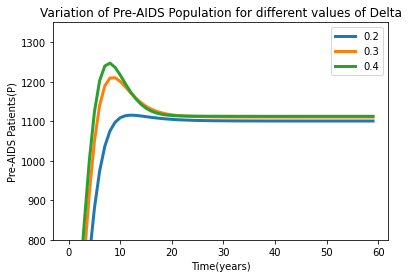

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Q=2000
d=1/70
E=0.4
beta=0.05
c=25
T=0.01
mu=0.5
sigma=0.3
a=1
#delta=0.2

N0, I0, P0, A0 = 10000, 2000, 500, 200  # initial conditions
n=60
t=[x for x in range(n)] # no of days

def RK4(n, delta, N0, I0, P0, A0, dt = 1):
     
    N=np.empty(n)
  
    I=np.empty(n)
    P=np.empty(n)
    A=np.empty(n)
    N[0],P[0],I[0],A[0]=N0,P0,I0,A0
    
    def dNdt(t, N, I, A):
        return (Q - d * N - a * A + ( 1 - E ) * T * I )

    def dIdt(t, N, P, I, A):
        return ( (beta * c * ( N - I - P - A ) * I ) / N - ( delta + d ) * I + (1 - E) * T * I )
    
    def dPdt(t, P, I):
        return ( (delta * sigma * I) - (mu + d) * P )

   
    def dAdt(t, I, A, P):
        return (( 1 - sigma) * delta * I + mu * P - (a + d) * A )
  
    for i in range(0,n-1):
        Ni = N[i]
        Ii = I[i]
        Pi = P[i]
        Ai = A[i]
       

        N_k1 = dNdt(i, Ni, Ii, Ai)
        I_k1 = dIdt(t, Ni, Pi, Ii, Ai)
        P_k1 = dPdt(i, Pi, Ii)
        A_k1 = dAdt(i, Ii, Ai, Pi)
     
        
        
        N_k2 = dNdt(i + dt / 2, Ni + dt / 2 * N_k1, Ii + dt / 2 * I_k1, Ai + dt / 2 * A_k1)
        I_k2 = dIdt(i + dt / 2, Ni + dt / 2 * N_k1, Pi + dt / 2 * P_k1, Ii + dt / 2 * I_k1, Ai + dt / 2 * A_k1)
        P_k2 = dPdt(i + dt / 2, Pi + dt / 2 * P_k1, Ii + dt / 2 * I_k1)
        A_k2 = dAdt(i + dt / 2, Ii + dt / 2 * I_k1, Ai + dt / 2 * A_k1, Pi + dt / 2 * P_k1)
        
        N_k3 = dNdt(i + dt / 2, Ni + dt / 2 * N_k2, Ii + dt / 2 * I_k2, Ai + dt / 2 * A_k2)
        I_k3 = dIdt(i + dt / 2, Ni + dt / 2 * N_k2, Pi + dt / 2 * P_k2, Ii + dt / 2 * I_k2, Ai + dt / 2 * A_k2)
        P_k3 = dPdt(i + dt / 2, Pi + dt / 2 * P_k2, Ii + dt / 2 * I_k2)
        A_k3 = dAdt(i + dt / 2, Ii + dt / 2 * I_k2, Ai + dt / 2 * A_k2, Pi + dt / 2 * P_k2)
        
    
        N_k4 = dNdt(i + dt, Ni + dt * N_k3, Ii + dt * I_k3, Ai + dt * A_k3)
        I_k4 = dIdt(i + dt, Ni + dt * N_k3, Pi + dt * P_k3, Ii + dt * I_k3, Ai + dt * A_k3)
        P_k4 = dPdt(i + dt, Pi + dt * P_k3, Ii + dt * I_k3)
        A_k4 = dAdt(i + dt, Ii + dt * I_k3, Ai + dt * A_k3, Pi + dt * P_k3)
        
    
        N[i + 1] = Ni + dt / 6 * (N_k1 + 2 * N_k2 + 2 * N_k3 + N_k4)
        I[i + 1] = Ii + dt / 6 * (I_k1 + 2 * I_k2 + 2 * I_k3 + I_k4)
        P[i + 1] = Pi + dt / 6 * (P_k1 + 2 * P_k2 + 2 * P_k3 + P_k4)
        A[i + 1] = Ai + dt / 6 * (A_k1 + 2 * A_k2 + 2 * A_k3 + A_k4)
        
        
    #plt.plot(t,N,label='N',color='lawngreen',linewidth=3)    
    plt.plot(t,P,label=delta,linewidth=3)
    #plt.plot(t,I,label= delta, linewidth=3, color='orange')
    #plt.plot(t,A, label=T, linewidth=3,color='darkgreen')
  
    plt.legend(loc='best')
    plt.xlabel('Time(years)')
    plt.ylabel('Pre-AIDS Patients(P)')
    plt.ylim(800,1350)
    plt.title('Variation of Pre-AIDS Population for different values of Delta')

RK4(n, 0.2, 10000, 2000, 500, 200, 1)    
RK4(n, 0.3, 10000, 2000, 500, 200, 1)
RK4(n, 0.4, 10000, 2000, 500, 200, 1) 

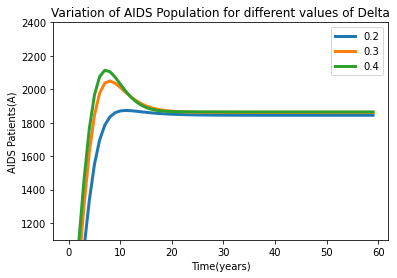

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Q=2000
d=1/70
E=0.4
beta=0.05
c=25
T=0.01
mu=0.5
sigma=0.3
a=1
#delta=0.2

N0, I0, P0, A0 = 10000, 2000, 500, 200  # initial conditions
n=60
t=[x for x in range(n)] # no of days

def RK4(n, delta, N0, I0, P0, A0, dt = 1):
     
    N=np.empty(n)
  
    I=np.empty(n)
    P=np.empty(n)
    A=np.empty(n)
    N[0],P[0],I[0],A[0]=N0,P0,I0,A0
    
    def dNdt(t, N, I, A):
        return (Q - d * N - a * A + ( 1 - E ) * T * I )

    def dIdt(t, N, P, I, A):
        return ( (beta * c * ( N - I - P - A ) * I ) / N - ( delta + d ) * I + (1 - E) * T * I )
    
    def dPdt(t, P, I):
        return ( (delta * sigma * I) - (mu + d) * P )

   
    def dAdt(t, I, A, P):
        return (( 1 - sigma) * delta * I + mu * P - (a + d) * A )
  
    for i in range(0,n-1):
        Ni = N[i]
        Ii = I[i]
        Pi = P[i]
        Ai = A[i]
       

        N_k1 = dNdt(i, Ni, Ii, Ai)
        I_k1 = dIdt(t, Ni, Pi, Ii, Ai)
        P_k1 = dPdt(i, Pi, Ii)
        A_k1 = dAdt(i, Ii, Ai, Pi)
     
        
        
        N_k2 = dNdt(i + dt / 2, Ni + dt / 2 * N_k1, Ii + dt / 2 * I_k1, Ai + dt / 2 * A_k1)
        I_k2 = dIdt(i + dt / 2, Ni + dt / 2 * N_k1, Pi + dt / 2 * P_k1, Ii + dt / 2 * I_k1, Ai + dt / 2 * A_k1)
        P_k2 = dPdt(i + dt / 2, Pi + dt / 2 * P_k1, Ii + dt / 2 * I_k1)
        A_k2 = dAdt(i + dt / 2, Ii + dt / 2 * I_k1, Ai + dt / 2 * A_k1, Pi + dt / 2 * P_k1)
        
        N_k3 = dNdt(i + dt / 2, Ni + dt / 2 * N_k2, Ii + dt / 2 * I_k2, Ai + dt / 2 * A_k2)
        I_k3 = dIdt(i + dt / 2, Ni + dt / 2 * N_k2, Pi + dt / 2 * P_k2, Ii + dt / 2 * I_k2, Ai + dt / 2 * A_k2)
        P_k3 = dPdt(i + dt / 2, Pi + dt / 2 * P_k2, Ii + dt / 2 * I_k2)
        A_k3 = dAdt(i + dt / 2, Ii + dt / 2 * I_k2, Ai + dt / 2 * A_k2, Pi + dt / 2 * P_k2)
        
    
        N_k4 = dNdt(i + dt, Ni + dt * N_k3, Ii + dt * I_k3, Ai + dt * A_k3)
        I_k4 = dIdt(i + dt, Ni + dt * N_k3, Pi + dt * P_k3, Ii + dt * I_k3, Ai + dt * A_k3)
        P_k4 = dPdt(i + dt, Pi + dt * P_k3, Ii + dt * I_k3)
        A_k4 = dAdt(i + dt, Ii + dt * I_k3, Ai + dt * A_k3, Pi + dt * P_k3)
        
    
        N[i + 1] = Ni + dt / 6 * (N_k1 + 2 * N_k2 + 2 * N_k3 + N_k4)
        I[i + 1] = Ii + dt / 6 * (I_k1 + 2 * I_k2 + 2 * I_k3 + I_k4)
        P[i + 1] = Pi + dt / 6 * (P_k1 + 2 * P_k2 + 2 * P_k3 + P_k4)
        A[i + 1] = Ai + dt / 6 * (A_k1 + 2 * A_k2 + 2 * A_k3 + A_k4)
        
        
    #plt.plot(t,N,label='N',color='lawngreen',linewidth=3)    
    #plt.plot(t,P,label=delta,linewidth=3)
    #plt.plot(t,I,label= delta, linewidth=3, color='orange')
    plt.plot(t,A, label=delta, linewidth=3)#,color='darkgreen')
  
    plt.legend(loc='best')
    plt.xlabel('Time(years)')
    plt.ylabel('AIDS Patients(A)')
    plt.ylim(1100,2400)
    plt.title('Variation of AIDS Population for different values of Delta')
    

RK4(n, 0.2, 10000, 2000, 500, 200, 1)    
RK4(n, 0.3, 10000, 2000, 500, 200, 1)
RK4(n, 0.4, 10000, 2000, 500, 200, 1) 

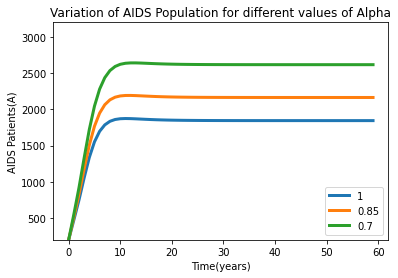

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Q=2000
d=1/70
E=0.4
beta=0.05
c=25
T=0.01
mu=0.5
sigma=0.3
#a=1
delta=0.2

N0, I0, P0, A0 = 10000, 2000, 500, 200  # initial conditions
n=60
t=[x for x in range(n)] # no of days

def RK4(n, a, N0, I0, P0, A0, dt = 1):
     
    N=np.empty(n)
  
    I=np.empty(n)
    P=np.empty(n)
    A=np.empty(n)
    N[0],P[0],I[0],A[0]=N0,P0,I0,A0
    
    def dNdt(t, N, I, A):
        return (Q - d * N - a * A + ( 1 - E ) * T * I )

    def dIdt(t, N, P, I, A):
        return ( (beta * c * ( N - I - P - A ) * I ) / N - ( delta + d ) * I + (1 - E) * T * I )
    
    def dPdt(t, P, I):
        return ( (delta * sigma * I) - (mu + d) * P )

   
    def dAdt(t, I, A, P):
        return (( 1 - sigma) * delta * I + mu * P - (a + d) * A )
  
    for i in range(0,n-1):
        Ni = N[i]
        Ii = I[i]
        Pi = P[i]
        Ai = A[i]
       

        N_k1 = dNdt(i, Ni, Ii, Ai)
        I_k1 = dIdt(t, Ni, Pi, Ii, Ai)
        P_k1 = dPdt(i, Pi, Ii)
        A_k1 = dAdt(i, Ii, Ai, Pi)
     
        
        
        N_k2 = dNdt(i + dt / 2, Ni + dt / 2 * N_k1, Ii + dt / 2 * I_k1, Ai + dt / 2 * A_k1)
        I_k2 = dIdt(i + dt / 2, Ni + dt / 2 * N_k1, Pi + dt / 2 * P_k1, Ii + dt / 2 * I_k1, Ai + dt / 2 * A_k1)
        P_k2 = dPdt(i + dt / 2, Pi + dt / 2 * P_k1, Ii + dt / 2 * I_k1)
        A_k2 = dAdt(i + dt / 2, Ii + dt / 2 * I_k1, Ai + dt / 2 * A_k1, Pi + dt / 2 * P_k1)
        
        N_k3 = dNdt(i + dt / 2, Ni + dt / 2 * N_k2, Ii + dt / 2 * I_k2, Ai + dt / 2 * A_k2)
        I_k3 = dIdt(i + dt / 2, Ni + dt / 2 * N_k2, Pi + dt / 2 * P_k2, Ii + dt / 2 * I_k2, Ai + dt / 2 * A_k2)
        P_k3 = dPdt(i + dt / 2, Pi + dt / 2 * P_k2, Ii + dt / 2 * I_k2)
        A_k3 = dAdt(i + dt / 2, Ii + dt / 2 * I_k2, Ai + dt / 2 * A_k2, Pi + dt / 2 * P_k2)
        
    
        N_k4 = dNdt(i + dt, Ni + dt * N_k3, Ii + dt * I_k3, Ai + dt * A_k3)
        I_k4 = dIdt(i + dt, Ni + dt * N_k3, Pi + dt * P_k3, Ii + dt * I_k3, Ai + dt * A_k3)
        P_k4 = dPdt(i + dt, Pi + dt * P_k3, Ii + dt * I_k3)
        A_k4 = dAdt(i + dt, Ii + dt * I_k3, Ai + dt * A_k3, Pi + dt * P_k3)
        
    
        N[i + 1] = Ni + dt / 6 * (N_k1 + 2 * N_k2 + 2 * N_k3 + N_k4)
        I[i + 1] = Ii + dt / 6 * (I_k1 + 2 * I_k2 + 2 * I_k3 + I_k4)
        P[i + 1] = Pi + dt / 6 * (P_k1 + 2 * P_k2 + 2 * P_k3 + P_k4)
        A[i + 1] = Ai + dt / 6 * (A_k1 + 2 * A_k2 + 2 * A_k3 + A_k4)
        
        
    #plt.plot(t,N,label='N',color='lawngreen',linewidth=3)    
    #plt.plot(t,P,label=delta,linewidth=3)
    #plt.plot(t,I,label= delta, linewidth=3, color='orange')
    plt.plot(t,A, label=a, linewidth=3)#,color='darkgreen')
  
    plt.legend(loc='best')
    plt.xlabel('Time(years)')
    plt.ylabel('AIDS Patients(A)')
    plt.ylim(200,3200)
    plt.title('Variation of AIDS Population for different values of Alpha')


RK4(n, 1, 10000, 2000, 500, 200, 1)    

RK4(n, 0.85, 10000, 2000, 500, 200, 1) 
RK4(n, 0.7, 10000, 2000, 500, 200, 1)

Variation of equilibrium constants with various parameters

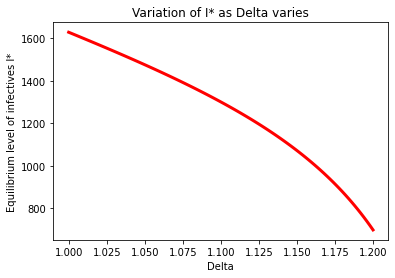

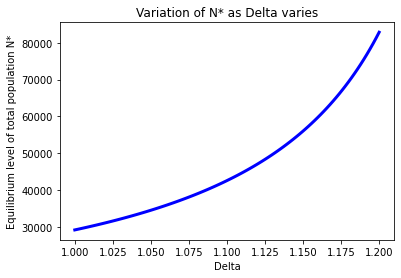

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Lambda=2000
d=1/70
E=0.4
beta=0.05
c=25
T=0.01
mu=0.5
sigma=0.3
a=1
#delta=0.2
n=100
delta=np.linspace(1,1.2,n)
gamma=np.empty(n)
I=np.empty(n)
N=np.empty(n)

for i in range(n):
    gamma[i]=(1+a*delta[i]/(mu+d)+(mu*delta[i]+d*delta[i]*(1-sigma)/((a+d)*(mu+d))))/(beta*c+(1-E)*T-(delta[i]+d))
    I[i] = Lambda/(beta*c*d*gamma[i]+a*(mu+d*(1-sigma))*delta[i]/((a+d)*(mu+d))-(1-E)*T)
    N[i] = beta*c*gamma[i]*I[i]


plt.plot(delta,I,color='r',linewidth=3)
plt.title('Variation of I* as Delta varies')
plt.xlabel('Delta')
plt.ylabel('Equilibrium level of infectives I*')
plt.show()


plt.plot(delta,N,color='b',linewidth=3)
plt.title('Variation of N* as Delta varies')
plt.xlabel('Delta')
plt.ylabel('Equilibrium level of total population N*')
plt.show()

Variation of equilibrium constants

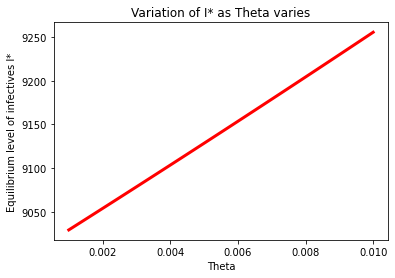

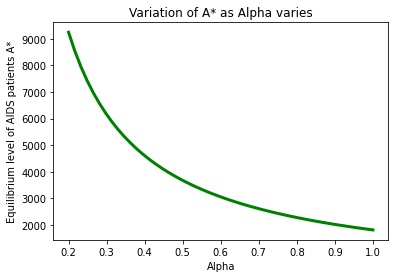

In [ ]:


import numpy as np
import matplotlib.pyplot as plt

Q=2000
d=1/70
E=0.4
beta=0.05
c=25
n=50
mu=0.5
sigma=0.3
a=1
delta=0.2
theta=0.01
I=np.empty(n)
A=np.empty(n)
T=np.linspace(0.001,0.01,n)  
alpha=np.linspace(0.2,1,n)

def Theta(T):
    g = ( 1 + ((a * delta) /( mu + d )) + (( mu * delta + d * delta * (1 - sigma))/( beta * c + (1 - E) * T  - delta - d)) )
    I = Q / (beta * c * d * g  + ((a * (mu + d * (1 - sigma))* delta)/((a + d)*(mu + d))) - (1-E)*T )

    return I

def AL(alpha):
     g1 = ( 1 + ((alpha * delta) /( mu + d )) + (( mu * delta + d * delta * (1 - sigma))/( beta * c + (1 - E) * theta  - delta - d)) )
     I1 = Q / (beta * c * d * g1  + ((alpha * (mu + d * (1 - sigma))* delta)/((alpha + d)*(mu + d))) - (1-E)*theta )
     A = (delta * I1 * (mu + d * ( 1 - sigma)))/((alpha + d)*(mu + d))
     return A

for i in range(n):
    I = Theta(T)
   
for i in range(n):    
     A = AL(alpha)
plt.plot(T,I,color='r',linewidth=3)
plt.title('Variation of I* as Theta varies')
plt.xlabel('Theta')
plt.ylabel('Equilibrium level of infectives I*')
plt.show()


plt.plot(alpha,A,color='g',linewidth=3)
plt.title('Variation of A* as Alpha varies')
plt.xlabel('Alpha')
plt.ylabel('Equilibrium level of AIDS patients A*')
plt.show()
